In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [15]:
x = df.drop('Purchased', axis=1)
y = df['Purchased']
x = x.drop(columns = 'Gender')

In [16]:
x

,User ID,Age,EstimatedSalary
0,15624510,19.0,19000.0
1,15810944,35.0,20000.0
2,15668575,26.0,43000.0
3,15603246,27.0,57000.0
4,15804002,19.0,76000.0
...,...,...,...
395,15691863,46.0,41000.0
396,15706071,51.0,23000.0
397,15654296,50.0,20000.0
398,15755018,36.0,33000.0


In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [22]:
from sklearn.linear_model import LogisticRegression

In [30]:
model1 = LogisticRegression()

In [32]:
model1.fit(x_train,y_train)
pred_y = model1.predict(x_test)
print(pred_y)

[0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 1 0 0 0 0]


In [33]:
from sklearn.metrics import accuracy_score

In [34]:
acc = accuracy_score(y_test,pred_y)
print(acc)

0.6916666666666667


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
Std = StandardScaler()
x_test = Std.fit_transform(x_test)
x_train = Std.fit_transform(x_train)
x_test
x_train

array([[ 1.20306256e+00, -9.79100420e-01, -1.11059025e+00],
       [-1.11265365e+00, -2.03575335e-01,  5.66967998e-02],
       [ 1.66760289e-01,  1.15359356e+00, -1.19813678e+00],
       [-4.46333294e-01, -2.03575335e-01,  6.40340327e-01],
       [-1.43728045e+00, -9.69406357e-03,  1.73425505e-01],
       [ 1.28995413e+00, -4.94397242e-01,  1.39907691e+00],
       [ 1.60018861e+00, -1.06634699e-01,  1.73425505e-01],
       [ 6.97580525e-01, -1.65768487e+00,  4.94429445e-01],
       [-5.94681731e-01,  8.72465721e-02, -5.56128904e-01],
       [-1.39920421e+00,  1.15359356e+00, -9.64679373e-01],
       [-1.49382959e+00,  2.81127843e-01, -1.18396258e-01],
       [ 8.96522658e-01, -9.69406357e-03,  2.31789858e-01],
       [-1.15948384e+00,  2.21994056e+00, -6.72857609e-01],
       [ 9.15546991e-01,  1.05665293e+00,  2.01190262e+00],
       [-1.67650454e+00,  2.81127843e-01,  5.66967998e-02],
       [ 4.17109477e-01, -1.06634699e-01, -1.76760611e-01],
       [ 1.01019994e+00, -1.07604106e+00

In [38]:
model2 = LogisticRegression()

In [39]:
model2.fit(x_train,y_train)
pred_y2 = model2.predict(x_test)
print(pred_y2)
acc2 = accuracy_score(y_test,pred_y2)
print(acc2)

[0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0]
0.8


In [40]:
# model1 was not normalize and accuracy was 69% 
# but after normalizing for model2 the accuracy was
# 80%

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [45]:
cm = confusion_matrix(y_test,pred_y)
cm

array([[63,  9],
       [28, 20]])

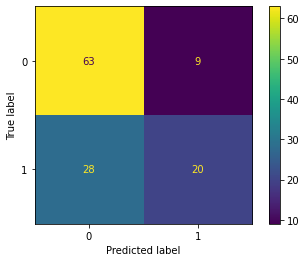

In [46]:
ConfusionMatrixDisplay(cm).plot()

In [48]:
from sklearn.metrics import recall_score ,precision_score

In [49]:
print("recall = ", recall_score(y_test,pred_y))

recall =  0.4166666666666667


In [1]:
from sklearn.metrics import classification_report
classification_report(y_test,pred_y)

NameError: name 'y_test' is not defined

In [ ]:
classification_report(y_test,pred_y2)